<a href="https://colab.research.google.com/github/Stkshamir/project-Predicting-Breast-Cancer-in-a-patient/blob/main/Predicting_Breast_Cancer_in_a_patient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#          Predicting Breast Cancer in a patient




# **Dataset Description**

The dataset consists of several predictor variables and one target variable, Diagnosis.
The target variable has values 'Benign' and 'Malignant', where 'Benign' means that the
cells are not harmful or there is no cancer and 'Malignant' means that the patient has
cancer and the cells have a harmful effect

Number of instances: 569

Number of attributes: 32 (ID, diagnosis, 30 real-valued input features)

Attribute information

ID number

Diagnosis (M = malignant, B = benign)

Ten real-valued features are computed for each cell nucleus:

radius (mean of distances from center to points on the perimeter)

texture (standard deviation of gray-scale values)

perimeter

area

smoothness (local variation in radius lengths)

compactness (perimeter^2 / area - 1.0)

concavity (severity of concave portions of the contour)

concave points (number of concave portions of the contour)

symmetry

fractal dimension ("coastline approximation" - 1)

The mean, standard error, and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.


# 1. Data Collection.

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [2]:
cancer = pd.read_csv("/content/cancer.csv")
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
cancer.drop("id", axis = 1, inplace = True)
cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN



# 2. Exploring Data Analysis

In [4]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [5]:
cancer.drop("Unnamed: 32",axis=1,inplace = True)

In [6]:
cancer.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [7]:
cancer.isnull().any()

diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_worst             False
fractal_di

In [8]:
cancer.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
cancer.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [10]:
cancer.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [11]:
cancer.groupby('diagnosis').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [12]:
cancer['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64


# 3. Data Visualization.

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline
sns.set_style('darkgrid')

Text(0.5, 0, 'Diagnosis')

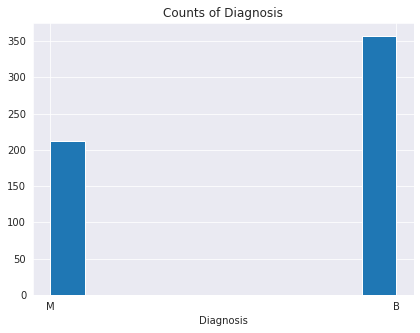

In [14]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.hist( cancer.diagnosis)
# plt.legend()
plt.title("Counts of Diagnosis")
plt.xlabel("Diagnosis")

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


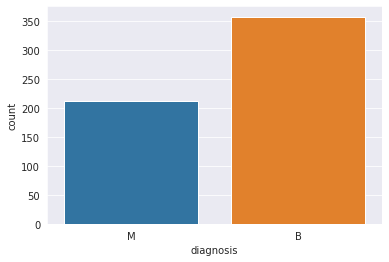

In [15]:
sns.countplot(cancer['diagnosis'],label="Count")

## **observation**
 M = Malignant

 B = Benign

 From the count plot, it can be easily inferred that there are more BENIGN diagnosed data points than MALIGNANT diagnosed data points


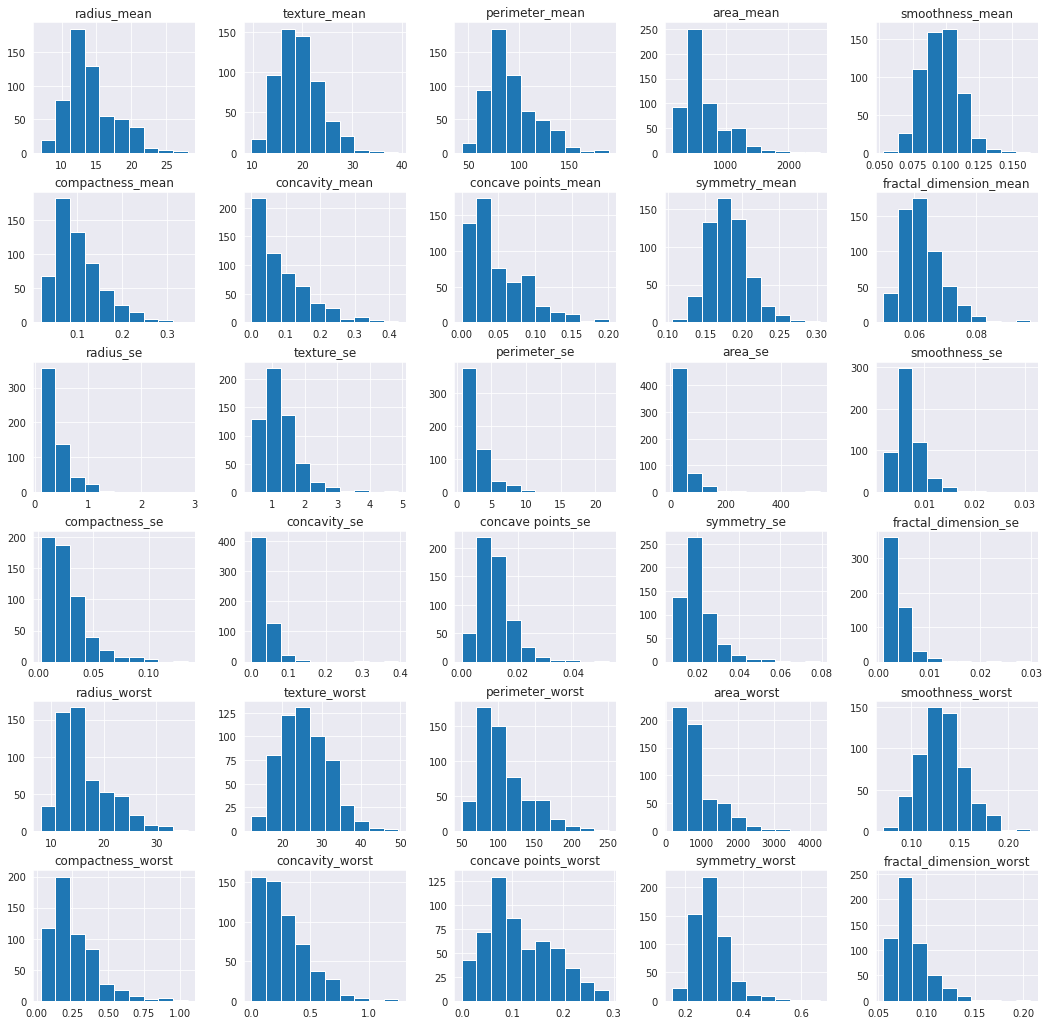

In [16]:
fig=cancer.hist(figsize=(18,18))

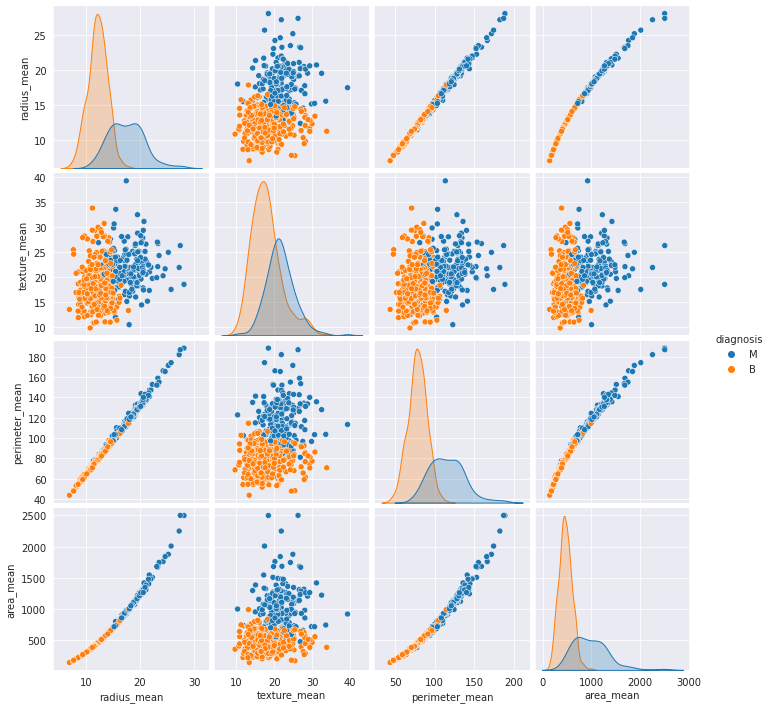

In [17]:
cols = ["diagnosis", "radius_mean", "texture_mean", "perimeter_mean", "area_mean"]

sns.pairplot(cancer[cols], hue="diagnosis")
plt.show()

In the above plots, 0 corresponds to BENIGN and 1 corresponds to MALIGNANT.

The visuals show a trend that has been followed throughout each plot. At lower values of the features, the diagnosis is predominantly BENIGN and at higher values, MALIGNANT has been the chief diagnosis.

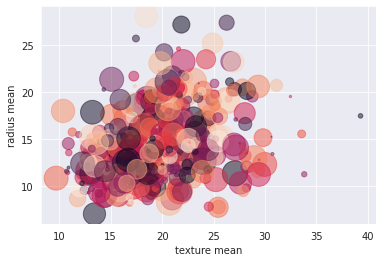

In [18]:
size = len(cancer['texture_mean'])

area = np.pi * (15 * np.random.rand( size ))**2
colors = np.random.rand( size )

plt.xlabel("texture mean")
plt.ylabel("radius mean") 
plt.scatter(cancer['texture_mean'], cancer['radius_mean'], s=area, c=colors, alpha=0.5);

In [19]:
cancer['diagnosis']=cancer['diagnosis'].map({'M':1,'B':0})

0 ==> Benign

1 ==> Malignant

# Feature Engineering



In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
cancer.shape

(569, 31)

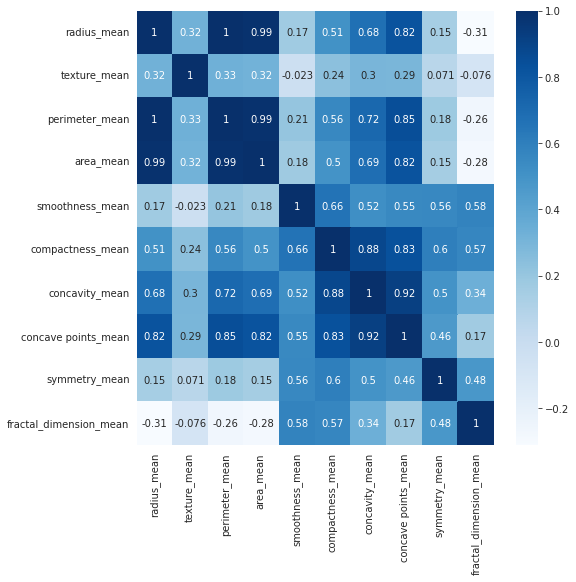

In [22]:
cancer_corr = cancer.iloc[:, 1:11].corr()
plt.figure(figsize=(8,8))
sns.heatmap(cancer_corr, cmap="Blues", annot=True)
plt.show()

**observation**

*As it was expected there are very strong correlations between radius, perimeter and area.

*Compactness, concavity and and concave points are also highly correlated.
These highly correlated features result in redundant information. It is suggested to remove highly correlated features to avoid a predictive bias for the information contained in these features.

In [23]:
X = cancer.drop(columns = 'diagnosis',axis = 1)
Y = cancer['diagnosis']

In [24]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [25]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [26]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
stand_scale = cancer.drop(['diagnosis'],axis = 1)
col_trans = make_column_transformer(
            (StandardScaler(), stand_scale.columns),
            remainder = 'passthrough')

In [27]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=101)

In [28]:
print(X.shape,X_train.shape,X_test.shape)

(569, 30) (398, 30) (171, 30)


In [29]:
col_trans.fit_transform(X_train)

array([[-0.28192196,  0.66174195, -0.37431608, ..., -1.57163052,
        -0.987646  , -1.43016122],
       [ 0.18650131, -1.22186345,  0.28233605, ..., -0.05396602,
        -0.13691022,  0.38685223],
       [ 0.19207778,  0.51772843,  0.17417681, ...,  1.03113696,
         1.25592976,  1.32208767],
       ...,
       [ 0.57127757,  0.07425823,  0.52052941, ...,  0.56182245,
        -0.41995577, -1.13641521],
       [ 1.32410067,  0.48115357,  1.28210004, ...,  1.35098825,
         1.22554634,  0.7443152 ],
       [-0.08674559, -0.14747687, -0.10209509, ...,  0.20908924,
        -0.10172941,  0.29127678]])

# Classifier

In [30]:
model = svm.SVC()

In [31]:
model.fit(X_train,Y_train)

SVC()

In [32]:
X_train_presdiction = model.predict(X_train)
training_data_accuracy = metrics.accuracy_score(Y_train,X_train_presdiction)

In [33]:
print('Accuracy of training data = ',training_data_accuracy)

Accuracy of training data =  0.9170854271356784


In [34]:
X_test_presdiction = model.predict(X_test)
testing_data_accuracy = metrics.accuracy_score(Y_test,X_test_presdiction)

In [35]:
print('Accuracy of testing data = ',testing_data_accuracy)

Accuracy of testing data =  0.9239766081871345


In [36]:
model = svm.SVC()
model.fit(X_train, Y_train)
  
# print prediction results
predictions = model.predict(X_test)
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       105
           1       0.95      0.85      0.90        66

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171



Accuracy score is 92%

In [37]:
from sklearn.pipeline import make_pipeline
logreg = LogisticRegression(solver='lbfgs')
pipe = make_pipeline(col_trans,logreg)

In [38]:
pipe = make_pipeline(col_trans,logreg)
pipe.fit(X_train, Y_train)
Y_pred = pipe.predict(X_test)


In [39]:
print('Confusion Matrix - Training Dataset')
print(pd.crosstab(Y_train, pipe.predict(X_train), rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Training Dataset
Predicted    0    1  All
True                    
0          250    2  252
1            4  142  146
All        254  144  398


Let's check our False Negative rate which makes sense especially in health care field.

In [41]:
4/165

0.024242424242424242

Around 2.42% of observations are misclassified as Benign which actually is Malignant



Let's take a look at confusion matrix in out testing dataset

In [40]:
print('Confusion Matrix - Testing Dataset')
print(pd.crosstab(Y_test, Y_pred, rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Testing Dataset
Predicted    0   1  All
True                   
0          104   1  105
1            3  63   66
All        107  64  171


In [42]:
# Checking False Negative Rate
2/47

0.0425531914893617

4.25% of observations in testing data are misclassified as Benign

In [43]:
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
print('Precision Score: {}'.format(precision_score(Y_test,Y_pred)));
cm = confusion_matrix(Y_test, Y_pred)
sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity1)

specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)


Precision Score: 0.984375
Sensitivity :  0.9904761904761905
Specificity :  0.9545454545454546


In [44]:
from sklearn.metrics import roc_auc_score
print('ROC AUC Score: {}'.format(roc_auc_score(Y_test, Y_pred)))

ROC AUC Score: 0.9725108225108225


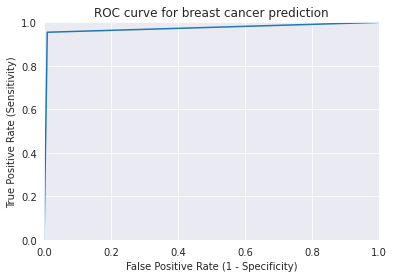

In [45]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test,Y_pred)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for breast cancer prediction')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

### **HYPER-PARAMETER TUNING**

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
grid = GridSearchCV(svm.SVC(), param_grid, refit = True,scoring = 'accuracy', verbose = 3) 
grid.fit(X_train, Y_train)
          

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.637 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=3)

In [48]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=1, gamma=0.0001)


In [49]:
grid_predictions = grid.predict(X_test)
  
# print classification report
print(classification_report(Y_test, grid_predictions))


              precision    recall  f1-score   support

           0       0.94      0.96      0.95       105
           1       0.94      0.89      0.91        66

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



BEST ACCURACY (AFTER HYPER-PARAMETER TUNING) = 94%

Building predictive **system**

In [50]:
input_data =(9.504,12.44,60.34,273.9,0.1024,0.06492,0.02956,0.02076,0.1815,0.06905,0.2773,0.9768,1.909,15.7,0.009606,0.01432,0.01985,0.01421,0.02027,0.002968,10.23,15.66,65.13,314.9,0.1324,0.1148,0.08867,0.06227,0.245,0.07773)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction =model.predict(input_data_reshaped)
print(prediction)
if (prediction[0]==0):
  print('The Breast cancer is Benign')

else:
  print('The Breast cancer is Malignant')

[0]
The Breast cancer is Benign


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


# observation

*If the output get [0] is Benigin the patient  have no cancer

*If the output get [1] is malignant the patient have cancer

=> According to input data the output is [0] so is Benigin, the cells are not hamfull,
  so the patient have no cancer.      
   


# Conclusion

In this kernal, We had seen the data clearning and EDA using pandas methods and show some visual graphs to know the behaviour of this dataset and finnaly we train some model for it and calculate the prediction and it's acciracy scores and predict the petient cancer stage Benigin or Maligant